In [72]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.17.0'

### Loading the data


In [73]:
df_1 = pd.read_csv("mode1_4hourly.csv")
df_2 = pd.read_csv("mode2_4hourly.csv")
df_3 = pd.read_csv("mode3_4hourly.csv")
df_4 = pd.read_csv("mode4_4hourly.csv")
df_undeco=pd.read_csv("undecomposed_data.csv")

plotting undecomposed_signal and reconstructed_signal from Vmd to verify are they same

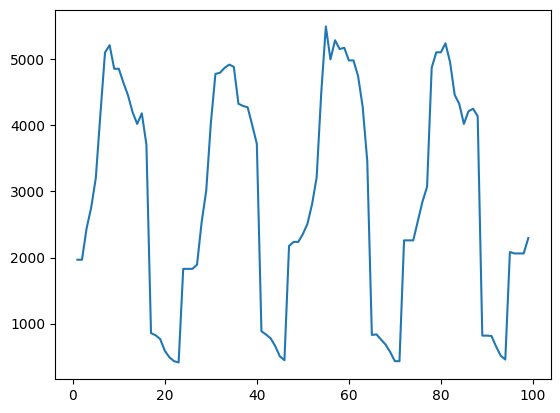

In [74]:
#plotting undecomposed_signal 
plt.plot(df_undeco[1:100])

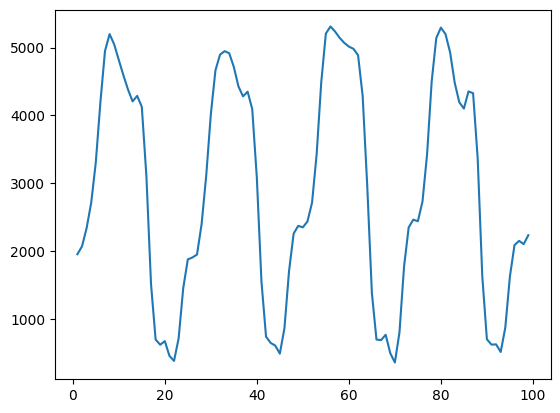

In [75]:
#plotting reconstructed_signal from Vmd 
plt.plot(df_1[1:100]+df_2[1:100]+df_3[1:100])

### Train Test split func

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def create_input_output_pairs(df, window_length=30 * 24 , prediction_length=24, step_size=24 ):
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Fit and transform the data
    data = scaler.fit_transform(df)
    # Create input-output pairs
    num_samples = (len(data) - window_length - prediction_length) // step_size + 1
    X = np.array([data[i:i + window_length] for i in range(0, num_samples * step_size, step_size)])
    y = np.array([data[i + window_length:i + window_length + prediction_length] for i in range(0, num_samples * step_size, step_size)])
    # Diving the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
    return X_train,X_test,y_train,y_test,scaler
#X_train,X_test,y_train,y_test = create_input_output_pairs(df)

### model_building,prediction evaluation

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM
from keras.callbacks import ModelCheckpoint
import tensorflow as tf



def build_and_train_model(X, y, checkpoint_filepath, final_model_path, epochs=620, batch_size=32):
    # Build the CNN-LSTM model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(24))
    
    # Compile the model with additional metrics
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=[
                      'mean_absolute_error',    # MAE
                      'mean_squared_error',     # MSE
                      'mean_absolute_percentage_error'
                  ])

    # Define the checkpoint to save the model during training
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,  # Set to False to save the entire model (architecture + weights)
        monitor='loss',           # Monitors the training loss
        mode='min',               # Save the model with the lowest loss
        save_best_only=True       # Only save the model if the loss improves
    )

    # Train the model and save the best version
    model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[model_checkpoint_callback])

    # Save the final trained model
    model.save(final_model_path)
    return model

#model=build_and_train_model(X_train,y_train,'mode1checkpoint.keras','mode1model.keras')
# model prediction
def predict_model(model,X_train,X_test):
    y_train=model.predict(X_train)
    y_test=model.predict(X_test)
    return y_train,y_test
#y_trainpred,y_testpred=predict_model(model,X_train,X_test)

def model_evaluate(model,X_test,y_test):
    # Evaluate the model on test data
    metrics = model.evaluate(X_test, y_test)
    # Print the metrics
    print("Evaluation Metrics:")
    print("Loss (MSE):", metrics[0])  # Loss (Mean Squared Error)
    print("Mean Absolute Error (MAE):", metrics[1])  # MAE
    print("Mean Squared Error (MSE):", metrics[2])  # MSE
    print("Mean Absolute Percentage Error (MAPE):", metrics[3])  # MAPE


Mode1

In [103]:
X_train_1,X_test_1,y_train_1,y_test_1,scaler1= create_input_output_pairs(df_1)

In [ ]:
model_1=build_and_train_model(X_train_1,y_train_1,'mode1checkpoint.keras','mode1model.keras')

In [113]:
y_train_1_pred,y_test_1_pred=predict_model(model_1,X_train_1,X_test_1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Mode2

In [105]:
X_train_2,X_test_2,y_train_2,y_test_2,scaler2 = create_input_output_pairs(df_2)

In [ ]:
model_2=build_and_train_model(X_train_2,y_train_2,'mode2checkpoint.keras','mode2model.keras')

In [114]:
y_train_2_pred,y_test_2_pred=predict_model(model_2,X_train_2,X_test_2)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Mode3

In [107]:
X_train_3,X_test_3,y_train_3,y_test_3,scaler3 = create_input_output_pairs(df_3)

In [ ]:
model_3=build_and_train_model(X_train_3,y_train_3,'mode3checkpoint.keras','mode3model.keras')

In [115]:
y_train_3_pred,y_test_3_pred=predict_model(model_3,X_train_3,X_test_3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Mode4

In [109]:
X_train_4,X_test_4,y_train_4,y_test_4 ,scaler4= create_input_output_pairs(df_4)

Undecomposed

In [110]:
X_train_undeco,X_test_undeco,y_train_undeco,y_test_undeco,scaler5 = create_input_output_pairs(df_undeco)

In [ ]:
model_undeco=build_and_train_model(X_train_undeco,y_train_undeco,'undecocheckpoint.keras','undecomodel.keras')

In [116]:
y_train_undeco_pred,y_test_undeco_pred=predict_model(model_undeco,X_train_undeco,X_test_undeco)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
#Getting to Original Scale
inv_y_train_1_pred = scaler1.inverse_transform(y_train_1_pred)
inv_y_train_2_pred = scaler2.inverse_transform(y_train_2_pred)
inv_y_train_3_pred = scaler3.inverse_transform(y_train_3_pred)
inv_y_train_undeco_pred = scaler5.inverse_transform(y_train_undeco_pred)

In [ ]:
#Getting to Original Scale
inv_y_test_1_pred = scaler1.inverse_transform(y_test_1_pred)
inv_y_test_2_pred = scaler2.inverse_transform(y_test_2_pred)
inv_y_test_3_pred = scaler3.inverse_transform(y_test_3_pred)
inv_y_test_undeco_pred = scaler5.inverse_transform(y_test_undeco_pred)

### Performance on Training data

below shows error because of VMD and error with out VMD

In [ ]:
# getting to original scale
# Assuming y_train_1, y_train_2, y_train_3, y_train_4, and y_train_undeco are 3D arrays
inv_y_train_1 = scaler1.inverse_transform(y_train_1.reshape(-1, y_train_1.shape[-1]))
inv_y_train_2 = scaler2.inverse_transform(y_train_2.reshape(-1, y_train_2.shape[-1]))
inv_y_train_3 = scaler3.inverse_transform(y_train_3.reshape(-1, y_train_3.shape[-1]))
inv_y_train_4 = scaler4.inverse_transform(y_train_4.reshape(-1, y_train_4.shape[-1]))
inv_y_train_undeco = scaler5.inverse_transform(y_train_undeco.reshape(-1, y_train_undeco.shape[-1]))

# Reshape back to (268, 24)
inv_y_train_1 = inv_y_train_1.reshape(268, 24)
inv_y_train_2 = inv_y_train_2.reshape(268, 24)
inv_y_train_3 = inv_y_train_3.reshape(268, 24)
inv_y_train_4 = inv_y_train_4.reshape(268, 24)
inv_y_train_undeco = inv_y_train_undeco.reshape(268, 24)

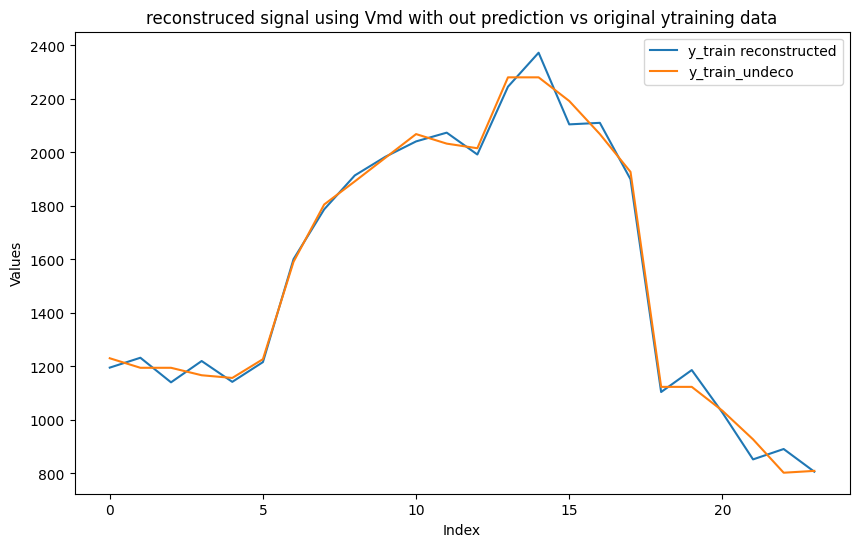

In [153]:
# plot original signal and reconstruced signal using Vmd with out prediction 
import matplotlib.pyplot as plt

# Assuming y_train_1, y_train_2, y_train_3, and y_train_undeco are defined
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot the sum of y_train_1, y_train_2, and y_train_3
plt.plot((inv_y_train_1[3] + inv_y_train_2[3] + inv_y_train_3[3]+inv_y_train_4[3]), label='y_train reconstructed')

# Plot y_train_undeco
plt.plot(inv_y_train_undeco[3], label='y_train_undeco')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('reconstruced signal using Vmd with out prediction vs original ytraining data')
plt.legend()

# Show the plot
plt.show()

In [146]:
# error between original signal and reconstruced signal using Vmd with out prediction 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Flatten arrays if they are multi-dimensional
int_y_train_combined=inv_y_train_1+inv_y_train_2+inv_y_train_3
inv_y_train_undeco_flat = inv_y_train_undeco.reshape(-1)
inv_y_train_combined_flat = int_y_train_combined.reshape(-1)

# Calculate errors
mae = mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)
rmse = np.sqrt(mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat))  # Alternative RMSE calculation

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)  # Replace 0s in y_true with epsilon
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)

# Print errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percent Error (MAE): {mape}")


Mean Absolute Error (MAE): 97.5027986162133
Root Mean Squared Error (RMSE): 9.874350541489465
Mean Absolute Percent Error (MAE): 6.384241565766824


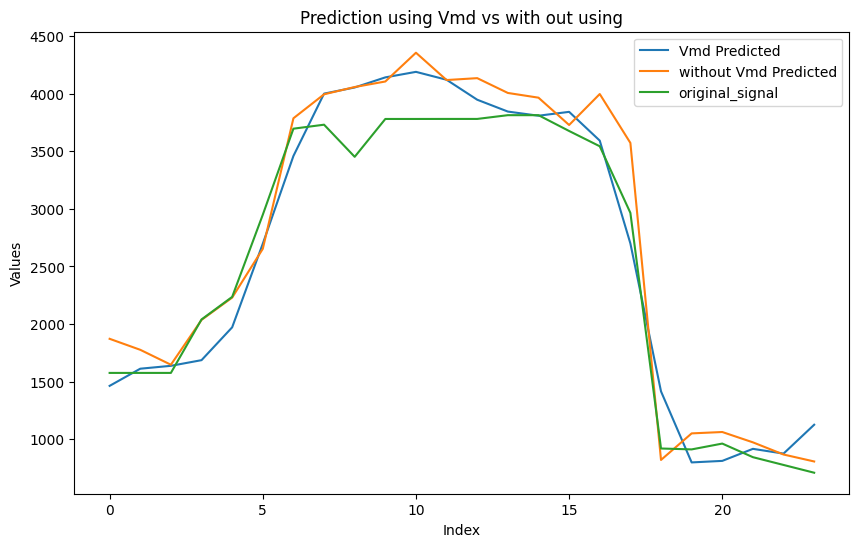

In [148]:
# plot of Original and Predicted reconstructed Signal using Vmd
import matplotlib.pyplot as plt

# Assuming y_train_1, y_train_2, y_train_3, and y_train_undeco are defined
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot the sum of y_train_1, y_train_2, and y_train_3
plt.plot((inv_y_train_1_pred[15] + inv_y_train_2_pred[15] + inv_y_train_3_pred[15]), label='Vmd Predicted')

# Plot y_train_undeco
plt.plot(inv_y_train_undeco_pred[15], label='without Vmd Predicted')

plt.plot(inv_y_train_undeco[15],label='original_signal')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Prediction using Vmd vs with out using')
plt.legend()

# Show the plot
plt.show()

In [149]:
# error between VMD and original

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Flatten arrays if they are multi-dimensional
int_y_train_combined=inv_y_train_1_pred+inv_y_train_2_pred+inv_y_train_3_pred
inv_y_train_undeco_flat = inv_y_train_undeco.reshape(-1)
inv_y_train_combined_flat = int_y_train_combined.reshape(-1)

# Calculate errors
mae = mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)
rmse = np.sqrt(mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat))  # Alternative RMSE calculation

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)  # Replace 0s in y_true with epsilon
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)

# Print errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percent Error (MAE): {mape}")


Mean Absolute Error (MAE): 196.3744483070937
Root Mean Squared Error (RMSE): 14.013366772731445
Mean Absolute Percent Error (MAE): 13.040384035771277


In [150]:
# error between prediction without vmd and original

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Flatten arrays if they are multi-dimensional
int_y_train_combined=inv_y_train_undeco_pred
inv_y_train_undeco_flat = inv_y_train_undeco.reshape(-1)
inv_y_train_combined_flat = int_y_train_combined.reshape(-1)

# Calculate errors
mae = mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)
rmse = np.sqrt(mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat))  # Alternative RMSE calculation

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)  # Replace 0s in y_true with epsilon
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)

# Print errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percent Error (MAE): {mape}")


Mean Absolute Error (MAE): 176.39541877981577
Root Mean Squared Error (RMSE): 13.281393706227362
Mean Absolute Percent Error (MAE): 11.34219155677761


### Performance on Test data

In [ ]:
# reshaping into Original Signal
inv_y_test_1 = scaler1.inverse_transform(y_test_1.reshape(-1, y_test_1.shape[-1])).reshape(y_test_1.shape[0], y_test_1.shape[1], -1)
inv_y_test_2 = scaler2.inverse_transform(y_test_2.reshape(-1, y_test_2.shape[-1])).reshape(y_test_2.shape[0], y_test_2.shape[1], -1)
inv_y_test_3 = scaler3.inverse_transform(y_test_3.reshape(-1, y_test_3.shape[-1])).reshape(y_test_3.shape[0], y_test_3.shape[1], -1)
inv_y_test_4 = scaler4.inverse_transform(y_test_4.reshape(-1, y_test_4.shape[-1])).reshape(y_test_4.shape[0], y_test_4.shape[1], -1)
inv_y_test_undeco = scaler5.inverse_transform(y_test_undeco.reshape(-1, y_test_undeco.shape[-1])).reshape(y_test_undeco.shape[0], y_test_undeco.shape[1], -1)


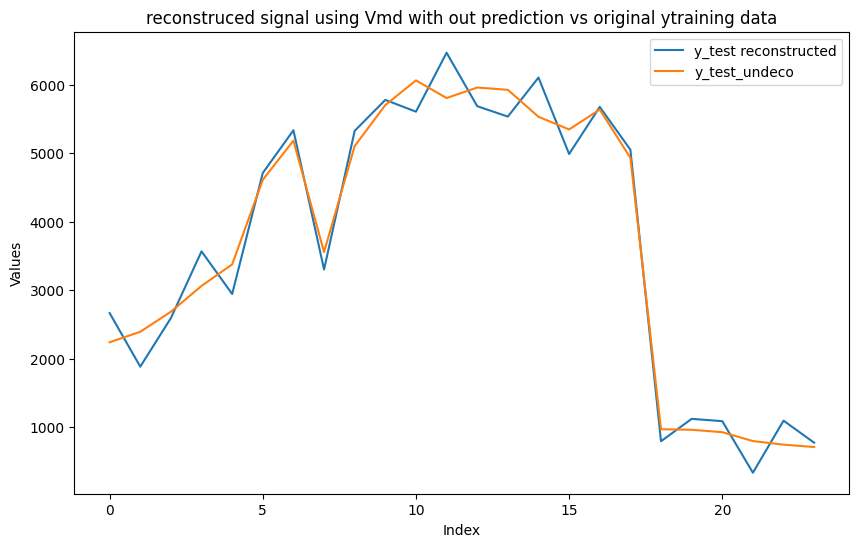

In [ ]:
# plot original signal and reconstruced signal using Vmd with out prediction 
import matplotlib.pyplot as plt

# Assuming y_train_1, y_train_2, y_train_3, and y_train_undeco are defined
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot the sum of y_train_1, y_train_2, and y_train_3
plt.plot((inv_y_test_1[3] + inv_y_test_2[3] + inv_y_test_3[3]+inv_y_test_4[3]), label='y_test reconstructed')

# Plot y_train_undeco
plt.plot(inv_y_test_undeco[3], label='y_test_undeco')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('reconstruced signal using Vmd with out prediction vs original ytest data')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# error between original signal and reconstruced signal using Vmd with out prediction 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Flatten arrays if they are multi-dimensional
int_y_train_combined=inv_y_test_1+inv_y_test_2+inv_y_test_3
inv_y_train_undeco_flat = inv_y_test_undeco.reshape(-1)
inv_y_train_combined_flat = int_y_train_combined.reshape(-1)

# Calculate errors
mae = mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)
rmse = np.sqrt(mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat))  # Alternative RMSE calculation

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)  # Replace 0s in y_true with epsilon
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)

# Print errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(mape)


Mean Absolute Error (MAE): 96.34221026424525
Root Mean Squared Error (RMSE): 9.8154067803757
6.493246751114003


Above if we use 4 th mode also still there is error of 5.5 percentage

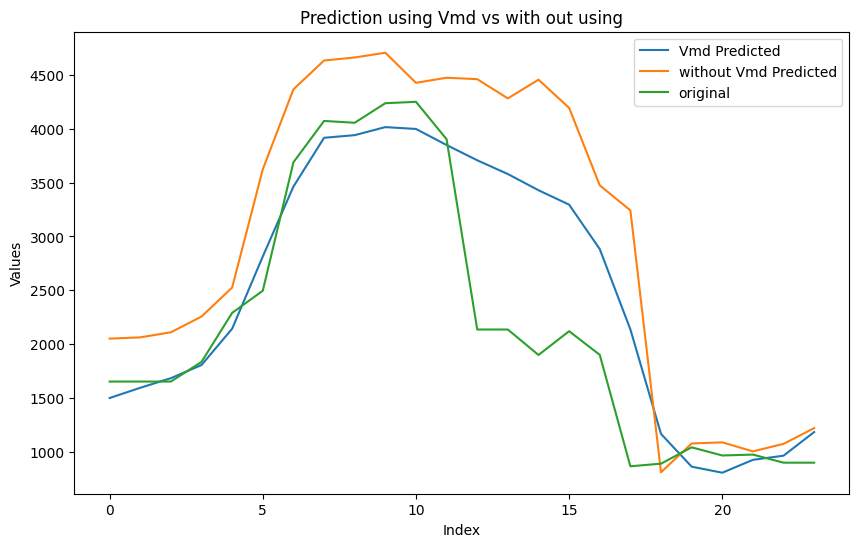

In [152]:
# plot of Original and Predicted reconstructed Signal using Vmd without using Vmd
import matplotlib.pyplot as plt

# Assuming y_train_1, y_train_2, y_train_3, and y_train_undeco are defined
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Plot the sum of y_train_1, y_train_2, and y_train_3
plt.plot((inv_y_test_1_pred[15] + inv_y_test_2_pred[15] + inv_y_test_3_pred[15]), label='Vmd Predicted')

# Plot y_train_undeco
plt.plot(inv_y_test_undeco_pred[15], label='without Vmd Predicted')

plt.plot(inv_y_test_undeco[15],label='original')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Prediction using Vmd vs with out using')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# error between prediction using VMD and original

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Flatten arrays if they are multi-dimensional
int_y_train_combined=inv_y_test_1_pred+inv_y_test_2_pred+inv_y_test_3_pred
inv_y_train_undeco_flat = inv_y_test_undeco.reshape(-1)
inv_y_train_combined_flat = int_y_train_combined.reshape(-1)

# Calculate errors
mae = mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)
rmse = np.sqrt(mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat))  # Alternative RMSE calculation

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)  # Replace 0s in y_true with epsilon
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)

# Print errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(mape)


Mean Absolute Error (MAE): 224.29733291506523
Root Mean Squared Error (RMSE): 14.976559448520385
15.049936605281875


In [142]:
# error between prediction without vmd and original

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Flatten arrays if they are multi-dimensional
int_y_train_combined=inv_y_test_undeco_pred
inv_y_train_undeco_flat = inv_y_test_undeco.reshape(-1)
inv_y_train_combined_flat = int_y_train_combined.reshape(-1)

# Calculate errors
mae = mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)
rmse = np.sqrt(mean_absolute_error(inv_y_train_undeco_flat, inv_y_train_combined_flat))  # Alternative RMSE calculation

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid division by zero
    y_true = np.where(y_true == 0, epsilon, y_true)  # Replace 0s in y_true with epsilon
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(inv_y_train_undeco_flat, inv_y_train_combined_flat)

# Print errors
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(mape)


Mean Absolute Error (MAE): 306.3674964145348
Root Mean Squared Error (RMSE): 17.503356718485023
19.695270079727074
